# Numerical first derivative of $tan^{-1}(x)$

In this exercise we have computed the first derivative of
$$f(x)=tan^{-1}(x)$$
for $x=\sqrt{2} $  with different step lengths $h$. The derivative has been computed using the formulas
$$f'_{2c}(x)= \frac{f(x+h)-f(x)}{h}+O(h)$$ and
$$f'_{3c}=\frac{f_h-f_{-h}}{2h}+O(h^2)$$
with $f_{\pm h}=f(x\pm h)$.

The source code for the program which computes the first derivative is called 'first_derivative.cpp', and it produces the result file 'RESULTS_DOUBLE.TXT'. The program is not very flexible, and the initial step and number of steps are hard-coded into the script, resulting in the need of compiling the program each time these parameters are to change. The initial step and number of steps are set to 1000 and 100 respectively. The reason for producing this iPython notebook is to analyze the error, 
$$ \epsilon=log_{10}\left(\left|\frac{f'_{\mathrm{computed}}-f'_{\mathrm{exact}}}{f'_{\mathrm{exact}}}\right|\right),$$ as a function of $log_{10}(h)$ for the above mentioned formulas, for both single and double precision results. In the case of single precision we have used the 'first_derivative_single.cpp' program.

We read the 'RESULTS_DOUBLE.TXT' and 'RESULTS_SINGLE.TXT' files and calculate the relative error, $\epsilon$, and plot them using python.

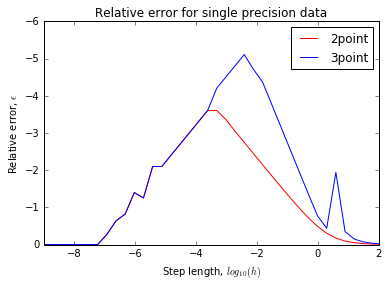

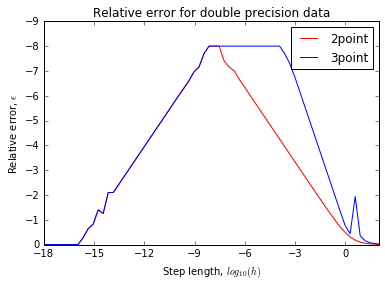

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to read and calculate errors from the results file
def calculate_error(filename, h_step, first_derative_2point_error, first_derative_3point_error):
  "docstring"
  f = open(filename, 'r');
  header1 = f.readline()
  header2 = f.readline()
  i=1
  for line in f:
    line = line.strip()
    columns = line.split()
    #take the log10 of h
    h_step.append(math.log10(float(columns[0])))
    # Calculate the error for the 2point and 3point derivative
    error1=math.log10(abs(float(columns[1])-1.0/3.0)/(1.0/3.0))
    error2=math.log10(abs(float(columns[2])-1.0/3.0)/(1.0/3.0))
    # Store the error in their respective arrays
    first_derative_2point_error.append(error1)
    first_derative_3point_error.append(error2)
    i=i+1
  f.close()
  return

h_step_single = []
first_derative_2point_error_single = []
first_derative_3point_error_single = []
h_step_double = []
first_derative_2point_error_double = []
first_derative_3point_error_double = []

calculate_error('RESULTS_SINGLE.TXT', h_step_single, first_derative_2point_error_single, first_derative_3point_error_single)
calculate_error('RESULTS_DOUBLE.TXT', h_step_double, first_derative_2point_error_double, first_derative_3point_error_double)

# Plot the errors
plt.plot(h_step_single,first_derative_2point_error_single, 'r', h_step_single, first_derative_3point_error_single)
plt.axis([-9, 2, 0, -6])
plt.title('Relative error for single precision data')
plt.ylabel(r'Relative error, $\epsilon$')
plt.xlabel(r'Step length, $log_{10}(h)$')
plt.legend(['2point','3point'])
plt.show()

plt.plot(h_step_double,first_derative_2point_error_double, 'r', h_step_double, first_derative_3point_error_double)
plt.axis([-18, 2, 0, -9])
plt.xticks(np.arange(-18,2,3))
plt.title('Relative error for double precision data')
plt.ylabel(r'Relative error, $\epsilon$')
plt.xlabel(r'Step length, $log_{10}(h)$')
plt.legend(['2point','3point'])
plt.show()



The total error is due to numerical approximation and loss of precision. Empirically, we notice that as the step length gets smaller, our numerical approximation get better, and thus the error gets smaller. But, we reach a point where the step length is so small, that the loss of precision takes over and it results in an errounos answer. Furthermore, we see that the derivative using 3 points is better than taking the derative using 2 points. And, double precision numbers are more accurate than single precision numbers. I am puzzled by the spike in the error for big step lengths for the 3 point calculation.

For the diligent reader, you notice that the relative error has a plateu where the relative error is on the order 10^{-8}, for the first derivative calculated with double precision and 3 points. This, is due to the precision set in for the output in our C++ program:

In [ ]:
ofile << setw(15) << setprecision(8) << h_step[i];
ofile << setw(15) << setprecision(8) << computed_derivative_2point[i];
ofile << setw(15) << setprecision(8) << computed_derivative_3point[i] << endl;

If the precision is changed from 8 to 16 in our C++ program, we will produce a different plot:

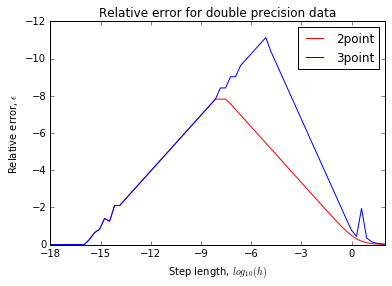

In [34]:
# Calculate error

h_step_double_16 = []
first_derative_2point_error_double_16 = []
first_derative_3point_error_double_16 = []
calculate_error('RESULTS_DOUBLE_16.TXT', h_step_double_16, first_derative_2point_error_double_16, 
                first_derative_3point_error_double_16)
# Plot
plt.plot(h_step_double_16, first_derative_2point_error_double_16, 'r', 
         h_step_double_16, first_derative_3point_error_double_16)
plt.axis([-18, 2, 0, -12])
plt.xticks(np.arange(-18,2,3))
plt.title('Relative error for double precision data')
plt.ylabel(r'Relative error, $\epsilon$')
plt.xlabel(r'Step length, $log_{10}(h)$')
plt.legend(['2point','3point'])
plt.show()